In [1]:
%matplotlib inline
    
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor 

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# final df for model building
df1 = pd.read_csv("ML_model_wk40_to_20.csv")
df1.dropna(how='any', inplace=True)
del df1['ILI_weeks']
del df1['Unnamed: 0']
#del df1['week']
df1.head(2)

,Year,week,a_influenza,acute_bronchitis,body_temperature,braun_thermoscan,break_a_fever,bronchitis,chest_cold,cold_and_flu,...,walking_pneumonia,what_to_do_if_you_have_the_flu,Flu_Visit_Count,ILI_Visit_Count,Unspecified,CDC_Unweighted_ILI,ILI_lagwk1,ILI_lagwk2,ILI_lagwk3,ILI_lagwk4
0,2009,40,44,33,81,69,22,40,35,36,...,47,56,0.01338,0.01763,0.03074,5.66087,6.81522,7.61889,7.38836,6.33927
1,2009,41,51,51,77,46,24,43,35,43,...,53,58,0.01620,0.02103,0.03554,6.81522,7.61889,7.38836,6.33927,4.94349


In [4]:
#  combining year and week column 
def combine_year_week(row):
    return int(row["Year"]) * 100 + int(row["week"])

In [5]:
df1["YearWeek"] = df1.apply(combine_year_week, axis=1)

In [6]:
# reset index to YearWeek
df1.index = df1["YearWeek"]

In [7]:
model_df = df1.drop(["Year", "week", "YearWeek"], axis=1)
model_df.head(2)

,a_influenza,acute_bronchitis,body_temperature,braun_thermoscan,break_a_fever,bronchitis,chest_cold,cold_and_flu,cold_or_flu,cold_versus_flu,...,walking_pneumonia,what_to_do_if_you_have_the_flu,Flu_Visit_Count,ILI_Visit_Count,Unspecified,CDC_Unweighted_ILI,ILI_lagwk1,ILI_lagwk2,ILI_lagwk3,ILI_lagwk4
YearWeek,,,,,,,,,,,,,,,,,,,,,
200940,44,33,81,69,22,40,35,36,37,30,...,47,56,0.01338,0.01763,0.03074,5.66087,6.81522,7.61889,7.38836,6.33927
200941,51,51,77,46,24,43,35,43,49,41,...,53,58,0.01620,0.02103,0.03554,6.81522,7.61889,7.38836,6.33927,4.94349


# Independent variables
        # 3 independent variables from athena EHR 
            # [(flu visit counts)/ (total patient visit counts) 
            # (ILI visit counts)/ (total patient visit counts)
            # (unspecified viral or ILI visit counts)/ (total patient visit counts)]
        # CDC historical CDC_Unweighted_ILI values: collected from 2009 to 2016 (week 40 to 20)
        # 129 google search terms related to flu
        
      ======> 3 + 1 + 129
      
# Dependent variables 
        # 4 ILI weeks offset by 1 week

# split df to train dataset, dataset before year2015 and week 40 used at training dataset

In [8]:
train = model_df[model_df.index < 201540]
# train.head()


# defining  targets/labels to  y axis
                y_train = ILI lag week 1

                yy_train = ILI lag week 2

                yyy_train = ILI lag week 3

                yyyy_train = ILI lag week 4

In [9]:
y_train = train["ILI_lagwk1"]
# y_train

In [10]:
yy_train = train["ILI_lagwk2"]

In [11]:
yyy_train = train["ILI_lagwk3"]

In [12]:
yyyy_train =train["ILI_lagwk4"]

In [13]:
X_train = train.drop(["ILI_lagwk1", "ILI_lagwk2", "ILI_lagwk3", "ILI_lagwk4"], axis=1)
# X_train

# split df to train dataset,dataset after year2015 and week 40 used at training dataset

In [14]:
test = model_df[model_df.index >= 201540]
# test.head()

In [15]:
y_test = test["ILI_lagwk1"]

In [16]:
yy_test = test["ILI_lagwk2"]

In [17]:
yyy_test = test["ILI_lagwk3"]

In [18]:
yyyy_test = test["ILI_lagwk4"]

In [19]:
X_test = test.drop(["ILI_lagwk1", "ILI_lagwk2", "ILI_lagwk3", "ILI_lagwk4"], axis=1)

# Reference https://shankarmsy.github.io/stories/gbrt-sklearn.html#

##https://www.youtube.com/watch?v=IXZKgIsZRm0

# building a model for y_test = test["ILI_lagwk1"]

In [20]:
gbrt1 = GradientBoostingRegressor(n_estimators = 300, max_depth = 5) # number of sequential trees to be modeled

In [21]:
gbrt1.fit(X_train, y_train) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
y_pred = gbrt1.predict(X_test)

In [23]:
r2_score(y_test, y_pred)

0.7349032894996481

In [24]:
mean_absolute_error(y_test, y_pred)

0.22448980977562152

In [25]:
print("R-squared for ILI_lagwk1 Train: %.2f" %gbrt1.score(X_train, y_train)) 
print("R-squared for ILI_lagwk1 Test : %.2f" %gbrt1.score(X_test, y_test)) 

R-squared for ILI_lagwk1 Train: 1.00
R-squared for ILI_lagwk1 Test : 0.73


In [26]:
predictions1 = gbrt1.predict(X_test) 

In [27]:
# predict the values of y
predictions = gbrt1.predict(X_test)
y_test_unraveled = y_test.values.ravel()
y_test.index

Int64Index([201540, 201541, 201542, 201543, 201544, 201545, 201546, 201547,
            201548, 201549, 201550, 201551, 201552, 201601, 201602, 201603,
            201604, 201605, 201606, 201607, 201608, 201609, 201610, 201611,
            201612, 201613, 201614, 201615, 201616, 201617, 201618, 201619,
            201620],
           dtype='int64', name='YearWeek')

In [28]:
# store prediction and actual to df
pred1_df = pd.DataFrame({"Prediction_ILI_lagwk1": predictions1, "Actual_wk1": y_test_unraveled}).reset_index(drop=True)
pred1_df.index = y_test.index
pred1_df.head()

,Prediction_ILI_lagwk1,Actual_wk1
YearWeek,,
201540,1.366110,1.33029
201541,1.375936,1.41368
201542,1.430518,1.36882
201543,1.410874,1.48309
201544,1.500108,1.54494


In [29]:
# pred_df.to_csv(r'created/lagwk1.csv')

# # Create the GridSearchCV model

In [30]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'learning_rate':[ 0.02, 0.01, 0.1, 0.05], 
#             'max_depth':[1, 3, 5 ,7], 
#             'min_samples_leaf':[3, 5, 7 ,9], 
# #             'max_features':[0.1,0.3,1.0],
#             'n_estimators': [300, 500, 1000, 2000]
#              } 

# est = GradientBoostingRegressor()
# gs_cv = GridSearchCV(est, param_grid).fit(X_train, y_train)

# # best hyperparameter setting

# gs_cv.best_est 

# selecting important features  ["ILI_lagwk1"]

In [31]:
# # GBRF predictors variable importance
# # store most important variables under importances
# importances = gbrt.feature_importances_

In [32]:
# gbrt.feature_importances_.sum()

In [33]:
# # store most important variables/features under importances
# importances = gbrt.feature_importances_
# # importances

In [34]:
# sorted_features = sorted(zip(importances, X_train.columns), reverse=True)
# # sorted_features

In [35]:
# # sort important varibles and sotre them under indices
# important_columns = []
# for fimportance, name in sorted(zip(importances, X_train.columns), reverse=True):
#     if fimportance > 0.00009:
#         important_columns.append(name)

In [36]:
# important_feature_columns = important_columns
# # important_feature_columns

In [37]:
# important_features_df = model_df[important_feature_columns]
# important_features_df.head()

# defining important feature X train and X test dataset

In [38]:
# X_trainim = important_features_df[important_features_df.index < 201540]
# # trainim
# # .head(2)

In [39]:
# X_testim = important_features_df[important_features_df.index >= 201540]
# # testim
# # .head()

In [40]:
# gbrtim_ili_lag1 = GradientBoostingRegressor(n_estimators = 500, max_depth = 5) # number of sequential trees to be modeled

In [41]:
# gbrtim_ili_lag1.fit(X_trainim, y_train) 

In [42]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [43]:
# r2_score(y_test, y_pred)

In [44]:
# mean_absolute_error(y_test, y_pred)

In [45]:
# # GBR with important features for ili_lag1 week 1
# print("R-squared for Train gbrtim_ili_lag1: %.2f" %gbrtim_ili_lag1.score(X_trainim, y_train)) 
# print("R-squared for Test gbrtim_ili_lag1: %.2f" %gbrtim_ili_lag1.score(X_testim, y_test)) 

In [46]:
# # predict the values of y with important feature extraction for ili week 1
# predictions = gbrtim_ili_lag1.predict(X_testim)
# y_test_unraveled = y_test.values.ravel()
# y_test.index

In [47]:
# Make predictions using the X_test and y_test data
# Print at least 10 predictions vs their actual labels
# predictions = gbrtim_ili_lag1.predict(X_testim)
# print(f"First 10 Predictions: {predictions[:10]}")
# print(f"First 10 Actual labels: {y_test_unraveled[:10]}")

In [48]:
# # Print predictions vs their actual labels
# pred_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test_unraveled}).reset_index(drop=True)
# pred_df.index = y_test.index
# pred_df.head()

# building a model for y_test = test["ILI_lagwk2"]

In [49]:
gbrt2 = GradientBoostingRegressor(n_estimators = 300, max_depth = 5) # number of sequential trees to be modeled

In [50]:
gbrt2.fit(X_train, yy_train) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [51]:
yy_pred = gbrt2.predict(X_test)

In [52]:
r2_score(yy_test, yy_pred)

0.4134540912494058

In [53]:
mean_absolute_error(yy_test, yy_pred)

0.3342211124712236

In [54]:
print("R-squared for ILI_lagwk2 Train: %.2f" %gbrt2.score(X_train, yy_train)) 
print("R-squared for ILI_lagwk2 Test: %.2f" %gbrt2.score(X_test, yy_test)) 

R-squared for ILI_lagwk2 Train: 1.00
R-squared for ILI_lagwk2 Test: 0.41


In [55]:
predictions2 = gbrt2.predict(X_test) 

In [56]:
# predict the values of y
yy_test_unraveled = yy_test.values.ravel()
yy_test.index

Int64Index([201540, 201541, 201542, 201543, 201544, 201545, 201546, 201547,
            201548, 201549, 201550, 201551, 201552, 201601, 201602, 201603,
            201604, 201605, 201606, 201607, 201608, 201609, 201610, 201611,
            201612, 201613, 201614, 201615, 201616, 201617, 201618, 201619,
            201620],
           dtype='int64', name='YearWeek')

In [57]:
# store prediction and actual to df
pred2_df = pd.DataFrame({"Prediction_ILI_lagwk2": predictions2, "Actual_wk2": yy_test_unraveled}).reset_index(drop=True)
pred2_df.index = yy_test.index
pred2_df.head()

,Prediction_ILI_lagwk2,Actual_wk2
YearWeek,,
201540,1.410720,1.41368
201541,1.408494,1.36882
201542,1.504281,1.48309
201543,1.534654,1.54494
201544,1.563131,1.62532


In [58]:
# pred2_df.to_csv(r'created/lagwk2.csv')

In [59]:
# # Create the GridSearchCV model

# from sklearn.model_selection import GridSearchCV
# param_grid = {'learning_rate':[ 0.02, 0.01, 0.1, 0.05], 
#             'max_depth':[1, 3, 5 ,7], 
#             'min_samples_leaf':[3, 5, 7 ,9], 
# #             'max_features':[0.1,0.3,1.0],
#             'n_estimators': [300, 500, 1000, 2000]
#              } 

# est = GradientBoostingRegressor()
# gs_cv = GridSearchCV(est, param_grid).fit(X_train, y_train)

# # best hyperparameter setting

# gs_cv.best_est 

# selecting important features  ["ILI_lagwk2"]

# defining important feature X train and X test dataset

# building a model for y_test = test["ILI_lagwk3"]

In [60]:
gbrt3 = GradientBoostingRegressor(n_estimators = 300, max_depth = 5) # number of sequential trees to be modeled

In [61]:
gbrt3.fit(X_train, yyy_train) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [62]:
yyy_pred = gbrt3.predict(X_test)

In [63]:
r2_score(yyy_test, yyy_pred)

0.24392395528670396

In [64]:
mean_absolute_error(yyy_test, yyy_pred)

0.3502455144553695

In [65]:
print("R-squared for Train: %.2f" %gbrt3.score(X_train, yyy_train)) 
print("R-squared for Test: %.2f" %gbrt3.score(X_test, yyy_test)) 

R-squared for Train: 1.00
R-squared for Test: 0.24


In [66]:
predictions3 = gbrt3.predict(X_test) 

In [67]:
# predict the values of y
predictions = gbrt3.predict(X_test)
yyy_test_unraveled = yyy_test.values.ravel()
yyy_test.index

Int64Index([201540, 201541, 201542, 201543, 201544, 201545, 201546, 201547,
            201548, 201549, 201550, 201551, 201552, 201601, 201602, 201603,
            201604, 201605, 201606, 201607, 201608, 201609, 201610, 201611,
            201612, 201613, 201614, 201615, 201616, 201617, 201618, 201619,
            201620],
           dtype='int64', name='YearWeek')

In [68]:
pred3_df = pd.DataFrame({"Prediction_ILI_lagwk3": predictions3, "Actual_wk3": yyy_test_unraveled}).reset_index(drop=True)
pred3_df.index = yyy_test.index
pred3_df.head()

,Prediction_ILI_lagwk3,Actual_wk3
YearWeek,,
201540,1.426070,1.36882
201541,1.568097,1.48309
201542,1.565402,1.54494
201543,1.618924,1.62532
201544,1.530775,1.91565


In [69]:
# pred3_df.to_csv(r'created/lagwk3.csv')

# building a model for y_test = test["ILI_lagwk4"]

In [70]:
gbrt4 = GradientBoostingRegressor(n_estimators = 300, max_depth = 5) # number of sequential trees to be modeled

In [71]:
gbrt4.fit(X_train, yyyy_train) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:
yyyy_pred = gbrt4.predict(X_test)

In [73]:
r2_score(yyyy_test, yyyy_pred)

-0.4025233644472326

In [74]:
mean_absolute_error(yyyy_test, yyyy_pred)

0.5224773887304826

In [75]:
print("R-squared for Train: %.2f" %gbrt4.score(X_train, yyyy_train)) 
print("R-squared for Test: %.2f" %gbrt4.score(X_test, yyyy_test)) 

R-squared for Train: 1.00
R-squared for Test: -0.40


In [76]:
# predict the values of y
predictions4 = gbrt4.predict(X_test)
yyyy_test_unraveled = yyyy_test.values.ravel()
yyyy_test.index

Int64Index([201540, 201541, 201542, 201543, 201544, 201545, 201546, 201547,
            201548, 201549, 201550, 201551, 201552, 201601, 201602, 201603,
            201604, 201605, 201606, 201607, 201608, 201609, 201610, 201611,
            201612, 201613, 201614, 201615, 201616, 201617, 201618, 201619,
            201620],
           dtype='int64', name='YearWeek')

In [77]:
# store prediction and actual to df
pred4_df = pd.DataFrame({"Prediction_ILI_lagwk4": predictions4, "Actual_wk4": yyyy_test_unraveled}).reset_index(drop=True)
pred4_df.index = yyyy_test.index
pred4_df.head()

,Prediction_ILI_lagwk4,Actual_wk4
YearWeek,,
201540,1.402824,1.48309
201541,1.581011,1.54494
201542,1.741964,1.62532
201543,2.355027,1.91565
201544,2.418163,1.74368


In [100]:
import numpy

pred_df = pd.concat([pred1_df, pred2_df, pred3_df, pred4_df], axis=1, sort=False).reset_index()


pred_df['Year']=pred_df['YearWeek'].astype(str).str[0:4]
pred_df['Week']=pred_df['YearWeek'].astype(str).str[4:6]

del pred_df['YearWeek']

clean_df = pred_df[['Year', 'Week', 'Prediction_ILI_lagwk1', 'Actual_wk1', 
                   'Prediction_ILI_lagwk2', 'Actual_wk2',
                   'Prediction_ILI_lagwk3', 'Actual_wk3',
                   'Prediction_ILI_lagwk4', 'Actual_wk4']]

clean_df.index = np.arange(1, len(clean_df) + 1)

clean_df.head()

,Year,Week,Prediction_ILI_lagwk1,Actual_wk1,Prediction_ILI_lagwk2,Actual_wk2,Prediction_ILI_lagwk3,Actual_wk3,Prediction_ILI_lagwk4,Actual_wk4
1,2015,40,1.366110,1.33029,1.410720,1.41368,1.426070,1.36882,1.402824,1.48309
2,2015,41,1.375936,1.41368,1.408494,1.36882,1.568097,1.48309,1.581011,1.54494
3,2015,42,1.430518,1.36882,1.504281,1.48309,1.565402,1.54494,1.741964,1.62532
4,2015,43,1.410874,1.48309,1.534654,1.54494,1.618924,1.62532,2.355027,1.91565
5,2015,44,1.500108,1.54494,1.563131,1.62532,1.530775,1.91565,2.418163,1.74368


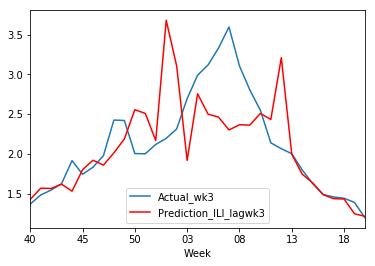

In [120]:
import matplotlib.pyplot as plt

ax = plt.gca()

clean_df.plot(kind='line',x='Week', y='Actual_wk3', ax=ax)
clean_df.plot(kind='line',x='Week', y='Prediction_ILI_lagwk3', color='red', ax=ax)


plt.show()


In [116]:
clean_df.plot(kind='line',x='Week', y='Actual_wk2', ax=ax)
clean_df.plot(kind='line',x='Week', y='Prediction_ILI_lagwk2', color='red', ax=ax)

plt.show()

In [117]:
clean_df.plot(kind='line',x='Week', y='Actual_wk3', ax=ax)
clean_df.plot(kind='line',x='Week', y='Prediction_ILI_lagwk3', color='red', ax=ax)

plt.show()

In [118]:

clean_df.plot(kind='line',x='Week', y='Actual_wk4', ax=ax)
clean_df.plot(kind='line',x='Week', y='Prediction_ILI_lagwk4', color='red', ax=ax)

plt.show()

In [101]:
clean_df.to_csv(r'created/completelagwk.csv')